In [17]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import config

In [7]:
# Create a connection to the database
cnx = mysql.connector.connect(
    user=config.db_user,
    password=config.db_password,
    host=config.db_host,
    database=config.db_database
)

In [11]:
# Create a cursor object
cursor = cnx.cursor()

# Open and read the file
with open('sql_queries/player_avg_xg_5_most_recent_games.sql', 'r') as file:
    sql_query = file.read()


# Use pandas to execute the SQL command and store the result in a DataFrame
df = pd.read_sql_query(sql_query, cnx)

# Close the connection
cnx.close()

/var/folders/g3/cm3vv2r574q5lbk4_l_6dmr80000gp/T/ipykernel_11201/1553894050.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, cnx)


In [13]:
df.head(4)

,team_name,player_name,avg_non_penalty_xG,avg_xG,games_played
0,Liverpool,Mohamed Salah,0.72,0.88,5
1,Manchester Utd,Marcus Rashford,0.70,0.70,3
2,Manchester City,Erling Haaland,0.65,0.65,4
3,Leicester City,Jamie Vardy,0.54,0.70,5


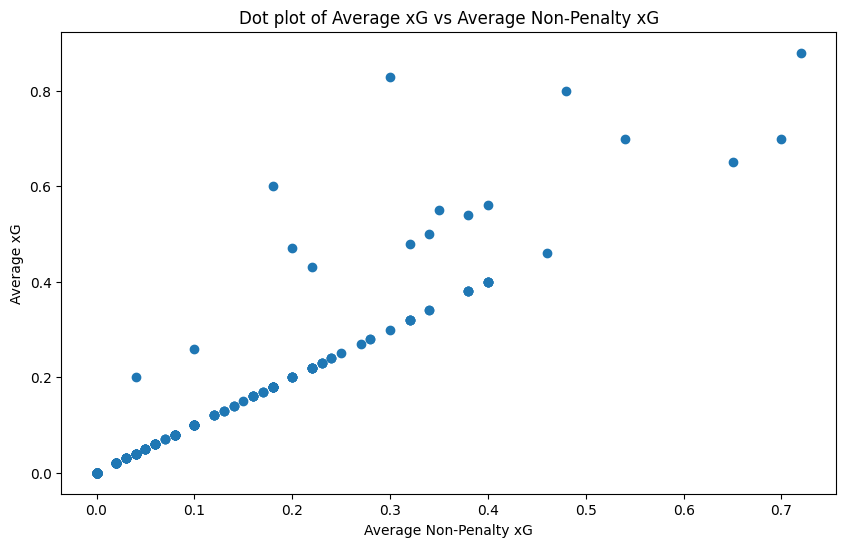

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the DataFrame
df_filtered = df[df['games_played'] > 2]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['avg_non_penalty_xG'], df_filtered['avg_xG'])

# Add labels
plt.xlabel('Average Non-Penalty xG')
plt.ylabel('Average xG')

# Add a title
plt.title('Dot plot of Average xG vs Average Non-Penalty xG')

# Show the plot
plt.show()